In [71]:
# Evaluating Machine Learning model

In [72]:
# Metric and Scoring
# 1- Estimator 'Score' method 
# 2- The scoring problem (Cross validation)
# 3- Problem specific metric function

In [73]:
# Classification Model

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np


heart_data = pd.read_csv('Heart Attack Data.csv')
heart_data.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


In [74]:
## Classification Model Evalution:
# 1- Accuracy
# 2- Area Under The Curve ROC
# 3- Confusion Matrix
# 4- Classification Report

In [75]:
x = heart_data.drop('heart_attack', axis = 1)
y = heart_data['heart_attack']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [76]:
clf = RandomForestClassifier().fit(x_train, y_train)
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
# 1= score method
clf.score(x_test, y_test)     # return the mean accuracy of the given test and lable

0.9033333333333333

In [78]:
# 2- cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv= 5)  # cv: cross valition spliting. It divide the data into n parts and run the test on that.

array([0.91 , 0.885, 0.905, 0.905, 0.915])

In [79]:
np.mean(cross_val_score(clf, x, y, cv= 5))   #3 it result is appox to score

np.float64(0.905)

In [80]:
# Scoring Parameters for Classification:

In [81]:
cross_val = cross_val_score(clf, x, y, cv= 5, scoring = None) 
cross_val.mean()

np.float64(0.907)

In [82]:
cross_val = cross_val_score(clf, x, y, cv= 5, scoring = "accuracy") 
cross_val.mean()

np.float64(0.9019999999999999)

In [83]:
cross_val = cross_val_score(clf, x, y, cv= 5, scoring = 'precision') 
cross_val.mean()

np.float64(0.737979797979798)

In [84]:
cross_val = cross_val_score(clf, x, y, cv= 5, scoring = 'recall') 
cross_val.mean()

np.float64(0.2523809523809524)

In [85]:
cross_val = cross_val_score(clf, x, y, cv= 5, scoring = 'f1') 
cross_val.mean()

np.float64(0.3345942850253195)

In [86]:
# Accuracy:
print(f'Acuuracy of Model is: {np.mean(cross_val_score(clf, x, y, cv=5)) * 100:2f}%')

Acuuracy of Model is: 90.500000%


In [87]:
# Area Under the Curve (AUC) | Reciever Operating Characteristics Curve (ROC):
# it is used to measure the show the curve, to measure area and get the accuracy of model
y_proba = clf.predict_proba(x_test)
y_proba[:5]  # predicted value
y_test[:5]  # ground reatily (truth)
# Comparsion:
y_proba[:5] , y_test[:5]  # Here we have 4 cases*

(array([[0.99, 0.01],
        [0.97, 0.03],
        [0.99, 0.01],
        [0.89, 0.11],
        [0.86, 0.14]]),
 351    0
 975    0
 271    0
 745    0
 260    0
 Name: heart_attack, dtype: int64)

In [88]:
## 4 Cases:
# 1) True Positive: Truth: 1 & Model: 1
# 2) False Positive: Truth: 0 & Model: 1
# 3) True Negative: Truth: 0 & Model: 0
# 4) False Negative: Truth: 1 & Model: 1

In [89]:
# calculate the fpr(flase positive rate), tpr(true positive rate) & threshold
y_pos_proba = y_proba[:,1]
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pos_proba)
fpr

array([0.        , 0.        , 0.        , 0.0037594 , 0.0037594 ,
       0.0075188 , 0.0075188 , 0.0112782 , 0.0112782 , 0.01503759,
       0.02631579, 0.02631579, 0.03007519, 0.03759398, 0.03759398,
       0.04135338, 0.04887218, 0.05263158, 0.06015038, 0.07142857,
       0.08270677, 0.10526316, 0.10902256, 0.13157895, 0.13909774,
       0.15413534, 0.18421053, 0.18796992, 0.19924812, 0.20676692,
       0.21428571, 0.22932331, 0.2593985 , 0.28195489, 0.30451128,
       0.33082707, 0.36466165, 0.43233083, 0.5037594 , 0.56766917,
       0.73684211, 1.        ])

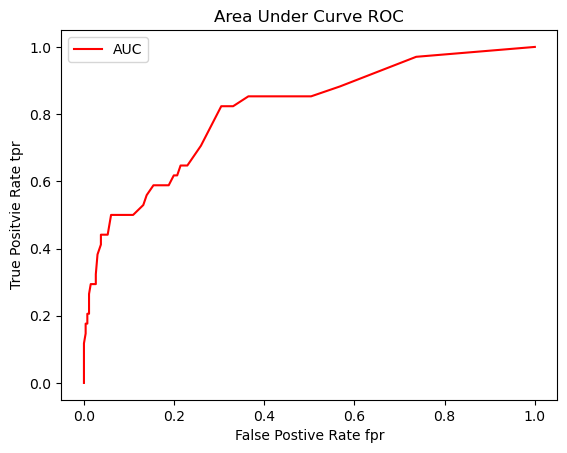

In [90]:
import matplotlib.pyplot as plt
def plot_roc(fpr, tpr):
    # plot curve
    plt.plot(fpr, tpr, color='red', label='AUC')
    # customization
    plt.title('Area Under Curve ROC')
    plt.xlabel('False Postive Rate fpr')
    plt.ylabel('True Positvie Rate tpr')
    plt.legend()
    plt.show()

plot_roc(fpr, tpr)

In [91]:
# Confusion Matrix:
# it tells the where the model gives us wrong result
# According to above 4 Cases, In 1st and 3rd the model gives us correct result while in 2nd and 4th case the model got wrong.
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(x_test)
confusion_matrix(y_test, y_predicted) ## Case 1) 4, Case 2) 1, Case 3) 270 & Case 4) 25.

array([[263,   3],
       [ 26,   8]])

In [92]:
len(y_test)  # total no. of samples

300

In [93]:
# For better visualization
pd.crosstab(y_test, y_predicted, rownames = ['Truth'], colnames= ['Predicted'])

Predicted,0,1
Truth,,
0,263,3
1,26,8


In [94]:
# Plotting Confused Matrix: 

In [95]:
import sys
!pip install seaborn

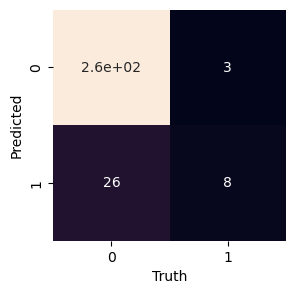

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

con_mat = confusion_matrix(y_test, y_predicted)
def plot_con_mat(con_mat):

    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(con_mat, annot = True, cbar = False)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')

plot_con_mat(con_mat)
    

In [97]:
## Conecpts
# Class Imbalance: When one class has significantly more/fewer samples than others in a dataset (e.g., 95% normal vs 5% fraud cases).
# Recall: Measures how well the model identifies actual positives.  Formula: True Positives / (True Positives + False Negatives)
# Precision: Measures how accurate positive predictions are.  Formula: True Positives / (True Positives + False Positives)
# F1 Score: Harmonic mean of precision and recall. Balances both metrics. Formula: 2 × (Precision × Recall) / (Precision + Recall)


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       266
           1       0.73      0.24      0.36        34

    accuracy                           0.90       300
   macro avg       0.82      0.61      0.65       300
weighted avg       0.89      0.90      0.88       300



In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pos_proba)

0.8103715170278638

In [116]:
# Different Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_predicted)}')
print(f'Precision: {precision_score(y_test, y_predicted)}')
print(f'Recall: {recall_score(y_test, y_predicted)}')
print(f'F1: {f1_score(y_test, y_predicted)}')

In [100]:
# -----------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

np.random.seed(7)

california = fetch_california_housing()
california_data = pd.DataFrame(california.data, columns= california.feature_names)
california_data.head()

In [ ]:
x = california_data.drop('Population', axis = 1)
y = california_data['Population']

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2)

reg = RandomForestRegressor().fit(x_train, y_train)

In [ ]:
reg.score(x_test, y_test)     # return the coefficent of determination R^2 of the prediction

In [ ]:
# Scoring Parameters for Regression:

In [ ]:
score_para = cross_val_score(reg, x, y, cv= 5, scoring = None) 
score_para.mean()

In [ ]:
score_para = cross_val_score(reg, x, y, cv= 5, scoring = 'r2') 
score_para.mean()

In [ ]:
score_para = cross_val_score(reg, x, y, cv= 5, scoring = 'neg_mean_absolute_error') 
score_para.mean()

In [ ]:
score_para = cross_val_score(reg, x, y, cv= 5, scoring = 'neg_mean_squared_error') 
score_para.mean()

In [ ]:
## regression Model:
# 1) R^2 Compare model prediction to the mean of target
# 2) Mean Absoulte Error (MAE)
# 3) Mean Squared Error (MSE)

In [ ]:
# R^2 >> Try to maximize it
reg.score(x_test, y_test)  ## It gives the value of R^2

In [ ]:
# MAE : Average of Absolute & Diffrence between Actual & Predicted Value >> Tell how much our model is wrong >>> Minimize it
from sklearn.metrics import mean_absolute_error

y_predicted = reg.predict(x_test)
mea = mean_absolute_error(y_test, y_predicted)
mea

In [ ]:
# MSE: it amliphies the error >>> always greater than MAE
from sklearn.metrics import mean_squared_error

msa = mean_squared_error(y_test, y_predicted)
msa

In [ ]:
# Different Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absoulte_error, mean_squared_error

In [ ]:
print(f'R2 : {r2_score(y_test, y_predicted)}')
print(f'MAE : {mean_absoulte_error(y_test, y_predicted)}')
print(f'MSE : {mean_squared_error(y_test, y_predicted)}')